## Instalação

In [1]:
# @title
!apt install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
!pip install automata-lib[visual]

import sys
def validate_string(cadeia,fa):
  if not all(a in fa.input_symbols for a in cadeia):
    print("Cadeia inválida")
    sys.exit(0)

def print_rastreamento(gen,fa,cadeia):
  try:
    print("Rastreamento de todos os estados alcançados:")
    i = 0
    atual = set(next(gen))
    for g in gen:
      novo = set(g)
      print(f"{chr(0x03B4)}({atual},{cadeia[i]}) -> {novo}")
      i+=1
      atual = novo
  except Exception:
    print("")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/m

# Lab01

## (01)

Construa um DFA que reconhece a linguagem descrita por $(ab)^+$, onde $\Sigma = \{a,b\}$.

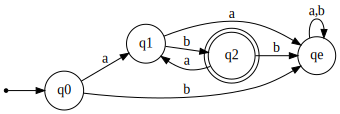

In [2]:
from automata.fa.dfa import DFA

dfa01 = DFA(
        states={'q0','q1','q2','qe'},
        input_symbols={'a', 'b'},
        transitions={
            'q0': {'a': 'q1', 'b': 'qe'},
            'q1': {'a': 'qe', 'b': 'q2'},
            'q2': {'a': 'q1', 'b': 'qe'},
            'qe': {'a': 'qe', 'b': 'qe'},
        },
        initial_state= 'q0',
        final_states={'q2'}
)
dfa01.show_diagram()





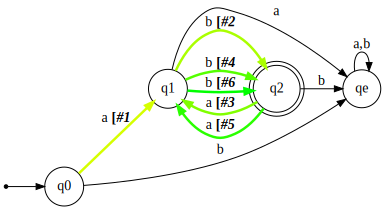

In [52]:
# Aceita
cadeia = 'ababab'
dfa01.show_diagram(cadeia)

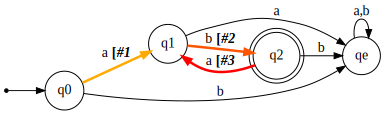

In [56]:
# Não aceita
cadeia = 'aba'
dfa01.show_diagram(cadeia)

## (02)

Construa um NFA que reconhece a linguagem descrita por $(0^*1^*)|(1^*0^*)$.

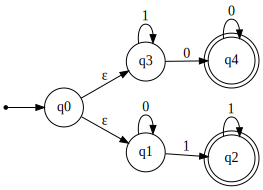

In [46]:
from automata.fa.nfa import NFA
nfa01 = NFA(
        states={'q0','q1','q2','q3','q4'},
        input_symbols={'1', '0'},
        transitions={
            'q0': {'': {'q1','q3'}},
            'q1': {'0': {'q1'}, '1': {'q2'}},
            'q2': {'1': {'q2'}},
            'q3': {'0': {'q4'}, '1': {'q3'}},
            'q4': {'0': {'q4'}},
        },
        initial_state= 'q0',
        final_states={'q2','q4'}
)

nfa01.show_diagram()

Rastreamento de todos os estados alcançados:
δ({'q3', 'q1', 'q0'},1) -> {'q2', 'q3'}
δ({'q2', 'q3'},1) -> {'q3', 'q2'}
δ({'q3', 'q2'},0) -> {'q4'}


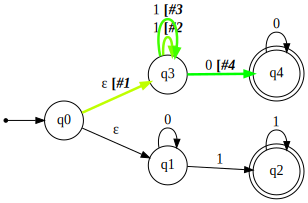

In [50]:
# Aceita
cadeia='110'
gen = nfa01.read_input_stepwise(cadeia)
print_rastreamento(gen,nfa01,cadeia)
nfa01.show_diagram(cadeia)

Rastreamento de todos os estados alcançados:
δ({'q3', 'q1', 'q0'},1) -> {'q2', 'q3'}
δ({'q2', 'q3'},1) -> {'q3', 'q2'}
δ({'q3', 'q2'},0) -> {'q4'}
δ({'q4'},1) -> set()



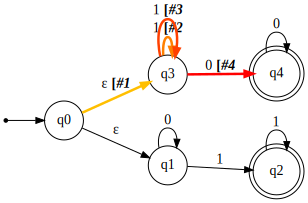

In [51]:
# Não aceita
cadeia='1101'
gen = nfa01.read_input_stepwise(cadeia)
print_rastreamento(gen,nfa01,cadeia)
nfa01.show_diagram(cadeia)